In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('HumanR_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [4]:
df.shape

(311, 36)

# Process the dates

In [5]:
df[ 'DOB_year' ] = pd.to_datetime( df[ 'DOB' ] ).dt.year
df[[ 'DOB_year' ]]

/var/folders/8p/3l7sfzp10l3_0w_tckpkhyhw0000gn/T/ipykernel_42320/3335341364.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[ 'DOB_year' ] = pd.to_datetime( df[ 'DOB' ] ).dt.year


,DOB_year
0,1983
1,1975
2,1988
3,1988
4,1989
...,...
306,1985
307,1982
308,1979
309,1979


In [6]:
DateofHire_date = pd.to_datetime( df[ 'DateofHire' ] )
df[ 'DateofHire_year' ] = DateofHire_date.dt.year
df[ 'DateofHire_month' ] =  DateofHire_date.dt.month

df[[ 'DateofHire_year', 'DateofHire_month' ]]

,DateofHire_year,DateofHire_month
0,2011,7
1,2015,3
2,2011,7
3,2008,1
4,2011,7
...,...,...
306,2014,7
307,2008,9
308,2010,4
309,2015,3


In [7]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DOB_year,DateofHire_year,DateofHire_month
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Exceeds,4.60,5,0,1/17/2019,0,1,1983,2011,7
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Fully Meets,4.96,3,6,2/24/2016,0,17,1975,2015,3
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Fully Meets,3.02,3,0,5/15/2012,0,3,1988,2011,7
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Fully Meets,4.84,5,0,1/3/2019,0,15,1988,2008,1
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Fully Meets,5.00,4,0,2/1/2016,0,2,1989,2011,7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [9]:
clean_df = df.drop( columns=['Salary', 'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'EmpStatusID', 'DeptID', 'PositionID', 'Zip', 'Sex', 'HispanicLatino', 'Termd', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'ManagerID', 'PerformanceScore', 'LastPerformanceReview_Date', 'RecruitmentSource', 'DOB', 'DateofHire', 'Position', 'State', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'Department', 'ManagerName'  ] )
clean_df

,GenderID,DeptID,PerfScoreID,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,DOB_year,DateofHire_year,DateofHire_month
0,1,5,4,19,4.60,5,0,0,1,1983,2011,7
1,1,3,3,27,4.96,3,6,0,17,1975,2015,3
2,0,5,3,20,3.02,3,0,0,3,1988,2011,7
3,0,5,3,19,4.84,5,0,0,15,1988,2008,1
4,0,5,3,19,5.00,4,0,0,2,1989,2011,7
...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,5,3,20,4.07,4,0,0,13,1985,2014,7
307,0,5,1,19,3.20,2,0,5,4,1982,2008,9
308,0,3,4,6,4.60,5,6,0,16,1979,2010,4
309,0,3,3,9,5.00,3,5,0,11,1979,2015,3


In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GenderID              311 non-null    int64  
 1   DeptID                311 non-null    int64  
 2   PerfScoreID           311 non-null    int64  
 3   PositionID            311 non-null    int64  
 4   EngagementSurvey      311 non-null    float64
 5   EmpSatisfaction       311 non-null    int64  
 6   SpecialProjectsCount  311 non-null    int64  
 7   DaysLateLast30        311 non-null    int64  
 8   Absences              311 non-null    int64  
 9   DOB_year              311 non-null    int32  
 10  DateofHire_year       311 non-null    int32  
 11  DateofHire_month      311 non-null    int32  
dtypes: float64(1), int32(3), int64(8)
memory usage: 25.6 KB


In [11]:
encoder = OneHotEncoder()
encoder.fit_transform( df[[ 'Position', 'State', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'Department', 'ManagerName' ]] )
print( encoder.categories_ )

feature_arr = encoder.fit_transform( df[[ 'Position', 'State', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'Department', 'ManagerName' ]] ).toarray()
feature_labels = encoder.categories_

,GenderID,DeptID,PerfScoreID,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,DOB_year,DateofHire_year,DateofHire_month
0,1.141798,0.359667,1.744516,0.346725,0.621302,1.222022,-0.519538,-0.320937,-1.580979,-0.516607,-0.864172,0.461256
1,1.141798,-1.489199,0.038401,1.634263,1.077769,-0.981160,2.038398,-0.320937,1.157257,-0.744946,1.183504,-0.749297
2,-0.875811,0.359667,0.038401,0.507667,-1.382080,-0.981160,-0.519538,-0.320937,-1.238699,-0.373895,-0.864172,0.461256
3,-0.875811,0.359667,0.038401,0.346725,0.925613,1.222022,-0.519538,-0.320937,0.814977,-0.373895,-2.399929,-1.354574
4,-0.875811,0.359667,0.038401,0.346725,1.128487,0.120431,-0.519538,-0.320937,-1.409839,-0.345353,-0.864172,0.461256
...,...,...,...,...,...,...,...,...,...,...,...,...
306,1.141798,0.359667,0.038401,0.507667,-0.050719,0.120431,-0.519538,-0.320937,0.472698,-0.459523,0.671585,0.461256
307,-0.875811,0.359667,-3.373829,0.346725,-1.153846,-2.082751,-0.519538,3.547725,-1.067560,-0.545150,-2.399929,1.066532
308,-0.875811,-1.489199,1.744516,-1.745526,0.621302,1.222022,2.038398,-0.320937,0.986117,-0.630777,-1.376091,-0.446659
309,-0.875811,-1.489199,0.038401,-1.262699,1.128487,-0.981160,1.612076,-0.320937,0.130418,-0.630777,1.183504,-0.749297


In [16]:
feature_labels = [ item for row in feature_labels for item in row ]

[array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Analyst',
       'Data Analyst ', 'Data Architect', 'Database Administrator',
       'Director of Operations', 'Director of Sales',
       'Enterprise Architect', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'President & CEO', 'Principal Data Architect',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Sr. Network Engineer'], dtype=object), array(['AL', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'ID', 'IN', 'KY', 'MA',
       'ME', 'MT', 'NC', 'ND', 'NH', 'NV', 'NY', 'OH', 'OR', 'PA', 'RI',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA'], dtype=object), array(['Eligible NonCitizen', '

In [17]:
features = pd.DataFrame( feature_arr, columns=feature_labels )

In [18]:
ready_df = pd.concat([ clean_df, features ], axis=1 )
ready_df

In [20]:
scaled_df = StandardScaler().fit_transform( ready_df )
scaled_df

,GenderID,DeptID,PerfScoreID,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,DOB_year,...,Black or African American,Hispanic,Two or more races,White,Admin Offices,Executive Office,IT/IS,Production,Sales,Software Engineering
0,1.141798,0.359667,1.744516,0.346725,0.621302,1.222022,-0.519538,-0.320937,-1.580979,-0.516607,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.141798,-1.489199,0.038401,1.634263,1.077769,-0.981160,2.038398,-0.320937,1.157257,-0.744946,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.875811,0.359667,0.038401,0.507667,-1.382080,-0.981160,-0.519538,-0.320937,-1.238699,-0.373895,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.875811,0.359667,0.038401,0.346725,0.925613,1.222022,-0.519538,-0.320937,0.814977,-0.373895,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.875811,0.359667,0.038401,0.346725,1.128487,0.120431,-0.519538,-0.320937,-1.409839,-0.345353,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1.141798,0.359667,0.038401,0.507667,-0.050719,0.120431,-0.519538,-0.320937,0.472698,-0.459523,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
307,-0.875811,0.359667,-3.373829,0.346725,-1.153846,-2.082751,-0.519538,3.547725,-1.067560,-0.545150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
308,-0.875811,-1.489199,1.744516,-1.745526,0.621302,1.222022,2.038398,-0.320937,0.986117,-0.630777,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
309,-0.875811,-1.489199,0.038401,-1.262699,1.128487,-0.981160,1.612076,-0.320937,0.130418,-0.630777,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [77]:
y = np.asanyarray( df[[ 'Salary' ]] )

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(ready_df, y, test_size=0.25)

In [22]:
train_model = LinearRegression()
train_model.fit( xtrain, ytrain )
print( 'Train R2-score:', train_model.score( xtrain, ytrain ) )

In [23]:
test_model = LinearRegression()
test_model.fit( xtest, ytest )
print( 'Test R2-score:', test_model.score( xtest, ytest ) )

LinearRegression()

In [25]:
df3 = pd.DataFrame()
coef = np.abs( test_model.coef_.ravel() )
df3[ 'coef' ] = coef / np.sum( coef )
df3['names'] = ready_df.columns
df3.sort_values( by=[ 'coef' ], ascending=True, inplace=True )
df3.set_index( 'names', inplace=True )
print( df3 )

plt.figure( figsize=( 20, 20 ) )
df3.coef.plot( kind='barh' )
plt.xlabel( 'Importance' )
plt.title( 'Importance of variables over the salary' )

Train R2-score: 0.955918607891375
Test R2-score: -11.787086568039017


                                          coef
names                                         
GenderID                          1.147952e-14
EmpSatisfaction                   2.180085e-14
FromDiversityJobFairID            3.447216e-14
DateofHire_year                   4.570340e-14
EngagementSurvey                  6.832360e-14
...                                        ...
American Indian or Alaska Native  5.472838e-02
Asian                             5.472838e-02
Black or African American         5.472838e-02
Two or more races                 5.472838e-02
White                             5.472838e-02

[63 rows x 1 columns]


Text(0.5, 1.0, 'Importance of variables over the salary')

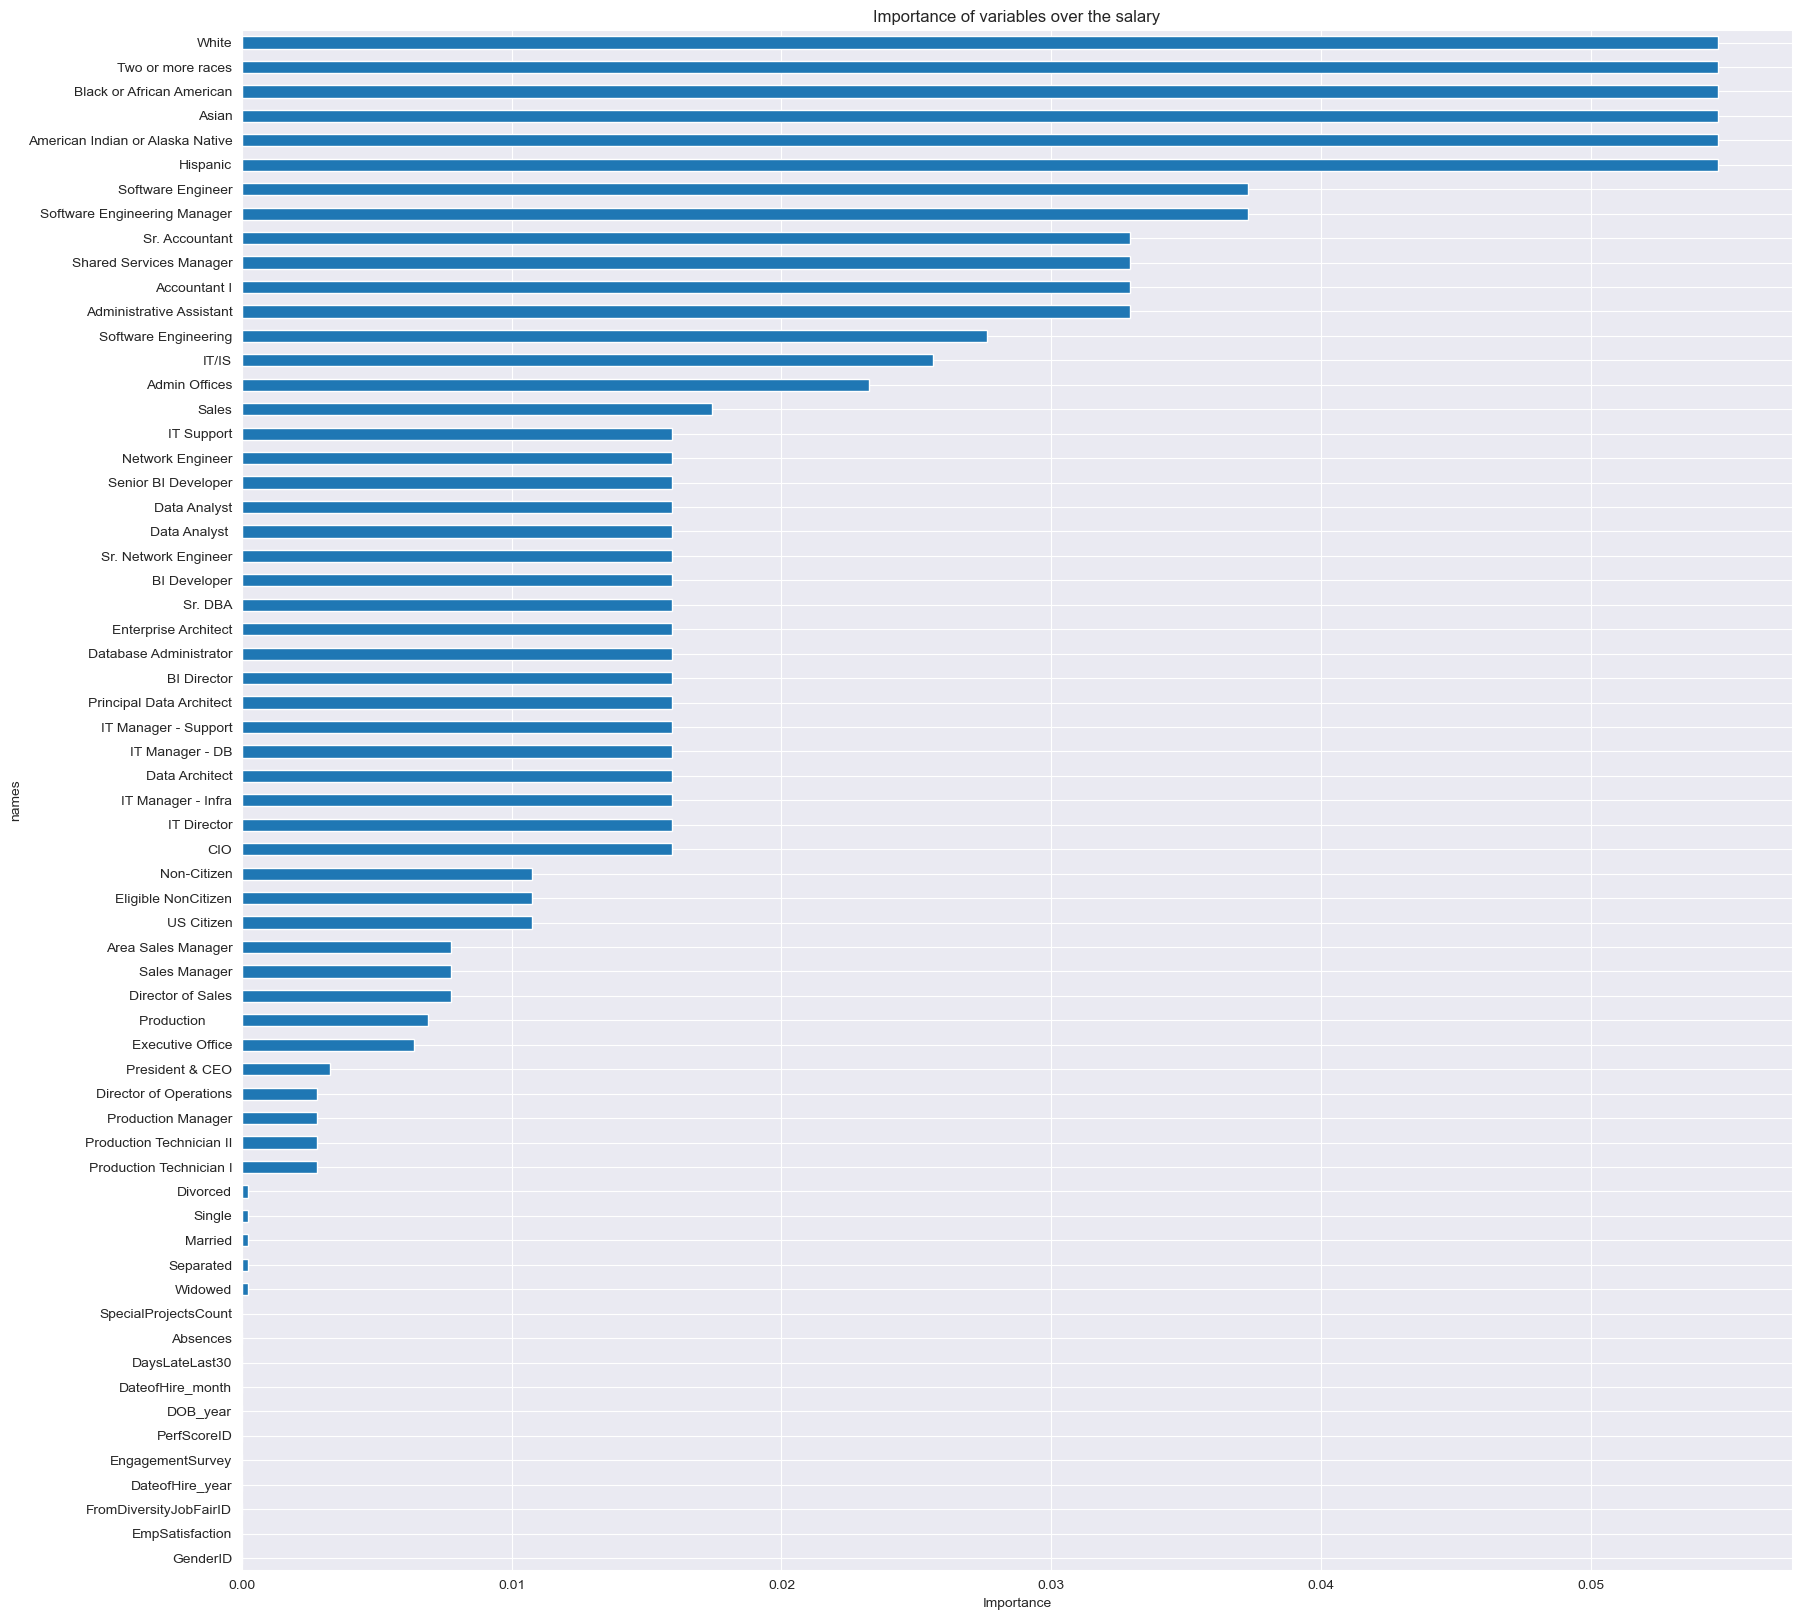

In [103]:
corr = ready_df.corr()
plt.figure( figsize=( 20, 20 ) )
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
)

plt.show()

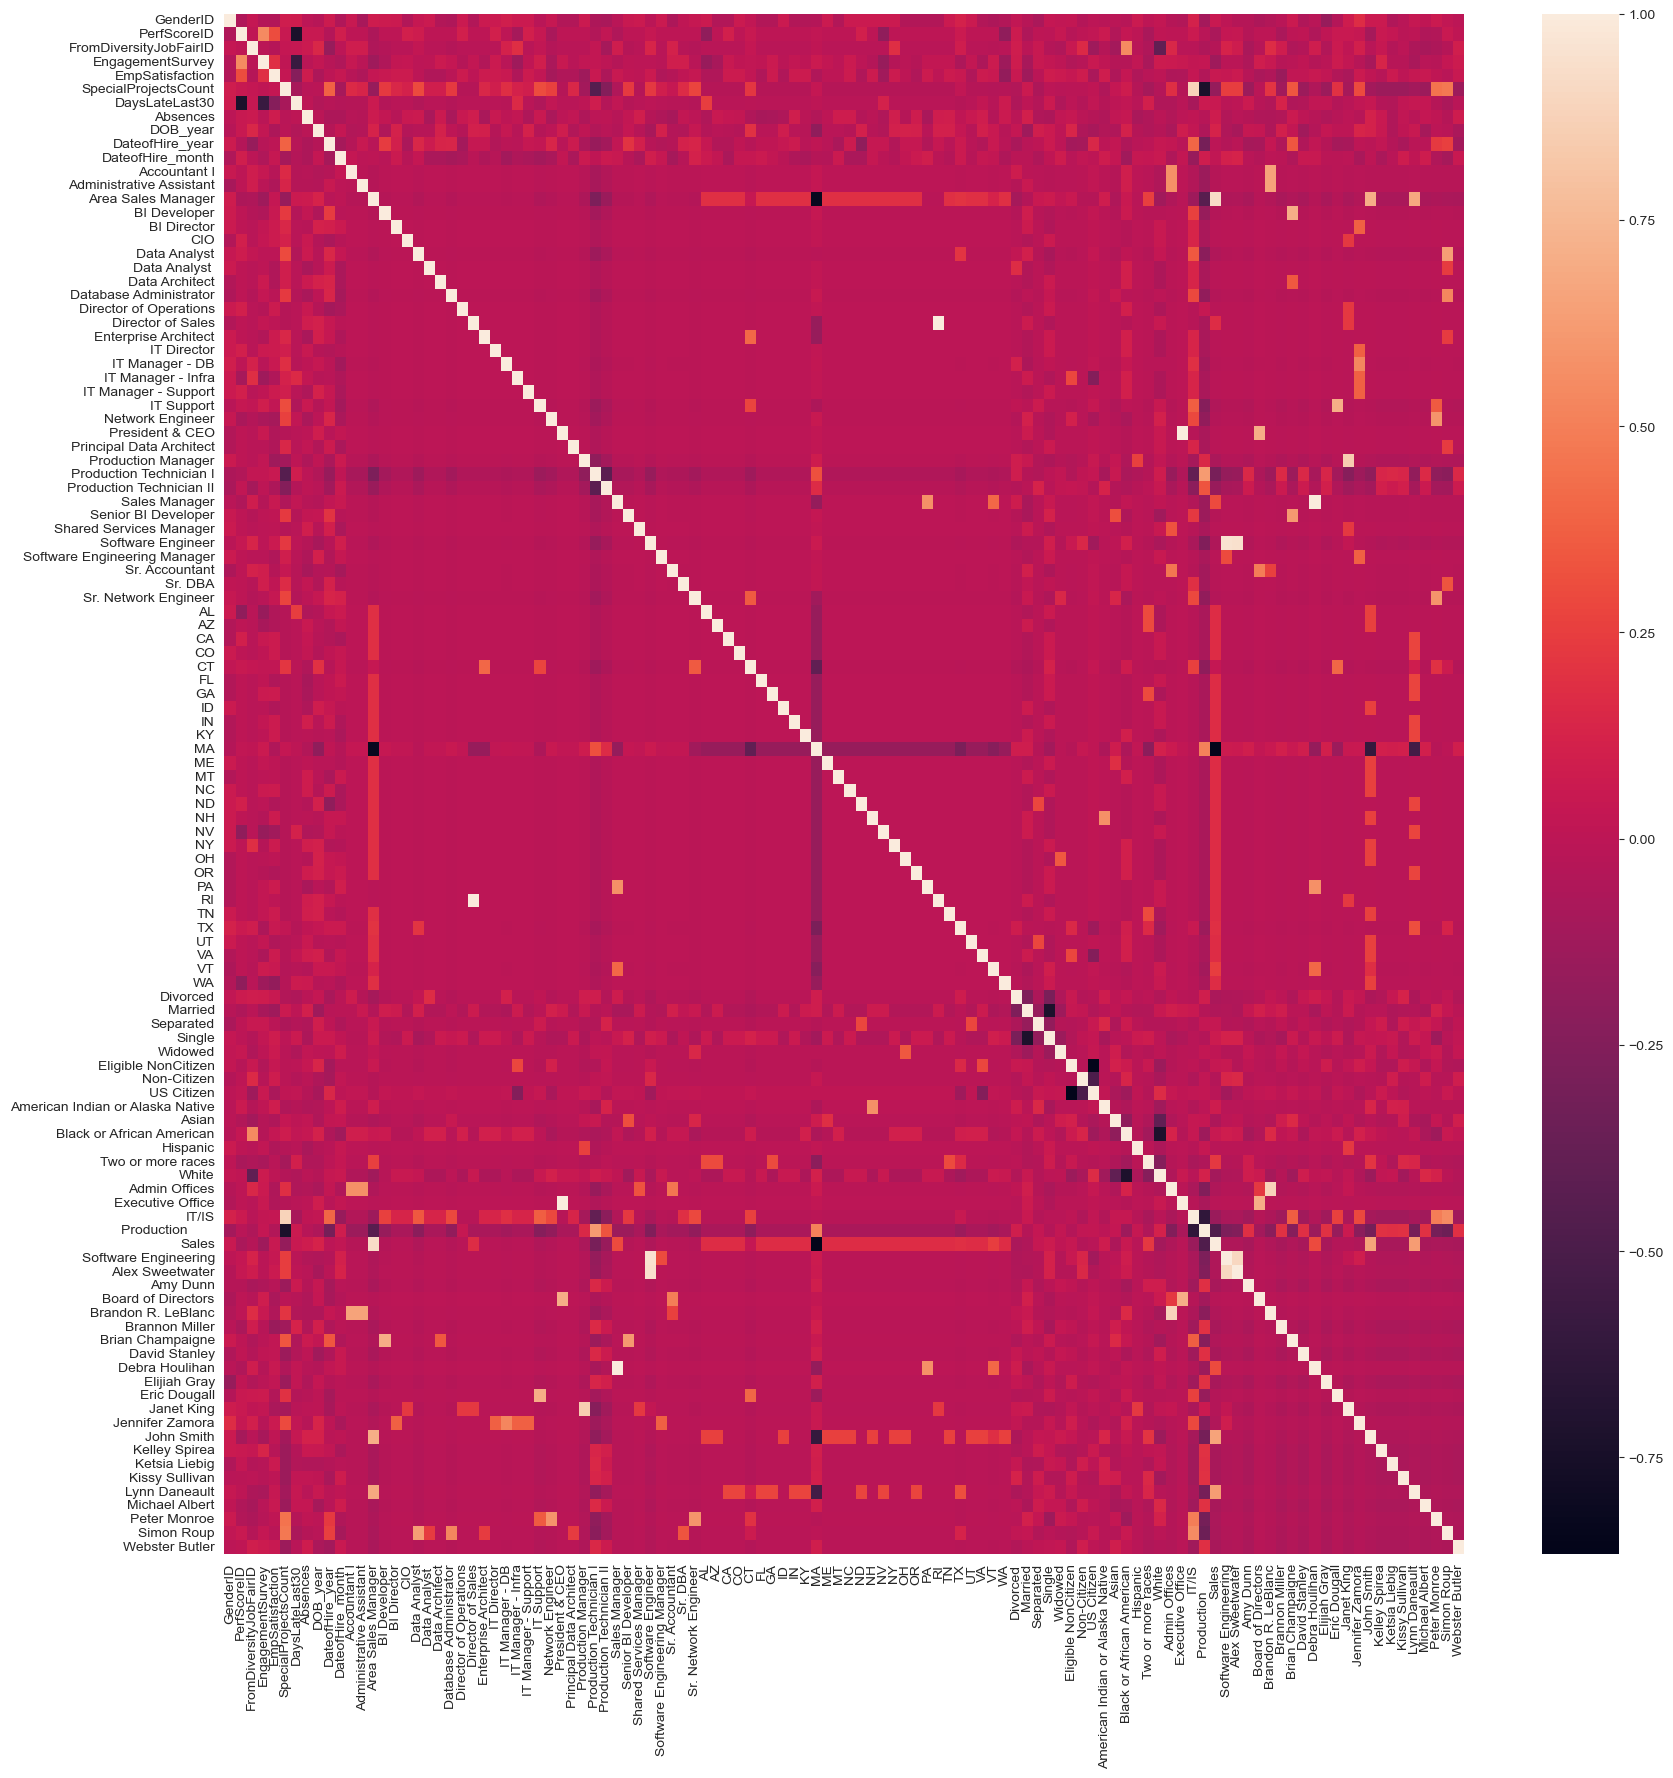

In [72]:
# pd.plotting.scatter_matrix( clean_df )

In [25]:
print( 'Train R2-score:', train_model.score( xtrain, ytrain ) )
print( 'Test R2-score:', test_model.score( xtest, ytest ) )

Train R2-score: 0.966800781269337
Test R2-score: -3.914116726765664e+19


In [ ]:
### This dataset is not good enough to get good results